<a href="https://www.kaggle.com/code/reemaloj/dermnet-datasets-with-densenet-file-2?scriptVersionId=205632273" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Report on DermNet Image Classification Code

https://www.kaggle.com/code/reemaloj/dermnet-datasets-with-densenet-file-2

This report provides an overview of the code for classifying images from the DermNet dataset, dividing them into different skin disease categories. The code uses **DenseNet-201** as a feature extractor and **ResNet-50** or **ResNet-101** for training. Below is a brief breakdown of the main steps.

---

### 1. Imports and Setup

Key libraries include PyTorch for model building, TorchVision for computer vision tasks, and additional tools like `PIL`, `Matplotlib`, `Seaborn`, and `tqdm` for image processing, visualization, and progress tracking.

### 2. Dataset Preparation

This involves:
   
- **DermnetDataset Class**: This custom class loads images from the dataframe, applies transformations, and returns them in the right format for training.
   
- **Data Distribution**: The `distribute_images` function balances samples across categories by copying a specific number of images into training and testing directories, creating a structure that ensures even distribution for learning.

- **DataFrames**: Two dataframes are created to hold paths and labels for training and testing sets, helping streamline loading during training.

### 3. Data Augmentation

Various data augmentation techniques are applied to improve generalization:
   
- **Random Transformations**: These include random rotations, horizontal flips, and color adjustments, simulating variations in lighting and orientation.
- **CutMix and CutOut**: Advanced augmentations are used to further regularize the model by mixing or masking parts of images.

### 4. Model Initialization

The **DenseNet-201** model, pretrained on ImageNet, serves as a feature extractor with frozen weights. **ResNet-50** or **ResNet-101** is the primary training model. Its fully connected layers are modified to match the dataset classes, with added batch normalization and dropout layers for better stability and generalization.

### 5. Training Loop

The training process includes:

- **Gradient Accumulation**: Gradients accumulate over batches, simulating a larger batch size while conserving memory.
   
- **Mixed Precision Training**: This reduces memory use and speeds up training.
   
- **AdamW Optimizer and Cosine Scheduler**: AdamW handles regularization, while the cosine scheduler with warm-up adjusts the learning rate adaptively.

### 6. Evaluation

The `test_step` function evaluates the model on the test set, tracking loss and accuracy. These metrics, saved for both training and testing sets, allow for a visual analysis of progress.

### 7. Visualization

- **Training Curves**: Plots show the loss and accuracy during training, helping assess convergence.
   
- **Confusion Matrix**: This visualizes model performance per category, indicating where the model may struggle.
   
- **Prediction Display**: The `visually_evaluate` function displays random test images with true and predicted labels, allowing a qualitative check on model predictions.

### 8. Additional Regularization

- **Label Smoothing**: Reduces over-confidence in predictions, enhancing model stability.
   
- **Early Stopping**: Stops training once accuracy reaches a preset threshold, saving computational time and avoiding overfitting.

---

### Summary

This code provides a robust workflow for DermNet image classification by balancing pretrained feature extraction (DenseNet-201) with further fine-tuning on ResNet-50 or ResNet-101. Techniques like CutMix, CutOut, label smoothing, and gradient accumulation help address common issues like overfitting and data limitations, ensuring the model generalizes well on new images. 



Processing train dataset:
Bullous Disease Photos: 448 images
Similar Bullous Disease: 448 images
Other: 448 images

Processing test dataset:
Bullous Disease Photos: 113 images
Similar Bullous Disease: 113 images
Other: 113 images


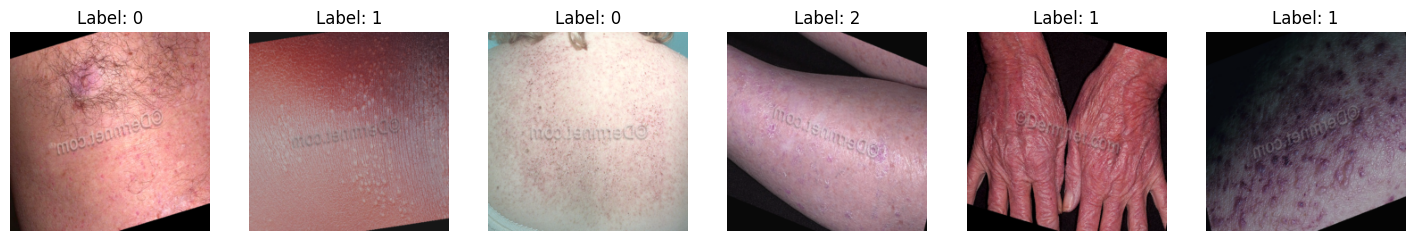

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 171MB/s]
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed i

Epoch 1/100


  0%|          | 0/11 [00:00<?, ?it/s]/tmp/ipykernel_24/1190293908.py:344: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
  0%|          | 0/3 [00:00<?, ?it/s]/tmp/ipykernel_24/1190293908.py:242: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Enable mixed precision
100%|██████████| 3/3 [00:02<00:00,  1.29it/s]


Epoch: 1 | train_loss: 1.2727 | train_acc: 0.3229 | test_loss: 1.1041 | test_acc: 0.3215
Epoch 2/100


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 2 | train_loss: 1.2601 | train_acc: 0.3266 | test_loss: 1.0971 | test_acc: 0.3687
Epoch 3/100


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 3 | train_loss: 1.1856 | train_acc: 0.3735 | test_loss: 1.1116 | test_acc: 0.3451
Epoch 4/100


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 4 | train_loss: 1.1787 | train_acc: 0.3973 | test_loss: 1.0875 | test_acc: 0.3864
Epoch 5/100


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 5 | train_loss: 1.1981 | train_acc: 0.3780 | test_loss: 1.0791 | test_acc: 0.4661
Epoch 6/100


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Epoch: 6 | train_loss: 1.1859 | train_acc: 0.4033 | test_loss: 1.0875 | test_acc: 0.4779
Epoch 7/100


100%|██████████| 3/3 [00:01<00:00,  1.54it/s]


Epoch: 7 | train_loss: 1.1446 | train_acc: 0.4219 | test_loss: 1.1170 | test_acc: 0.4218
Epoch 8/100


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 8 | train_loss: 1.1382 | train_acc: 0.4278 | test_loss: 1.1004 | test_acc: 0.4543
Epoch 9/100


100%|██████████| 3/3 [00:02<00:00,  1.40it/s]


Epoch: 9 | train_loss: 1.1602 | train_acc: 0.4122 | test_loss: 1.0655 | test_acc: 0.4808
Epoch 10/100


100%|██████████| 3/3 [00:01<00:00,  1.58it/s]


Epoch: 10 | train_loss: 1.1533 | train_acc: 0.4308 | test_loss: 1.1683 | test_acc: 0.4720
Epoch 11/100


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 11 | train_loss: 1.1397 | train_acc: 0.4196 | test_loss: 1.1357 | test_acc: 0.4779
Epoch 12/100


100%|██████████| 3/3 [00:02<00:00,  1.45it/s]


Epoch: 12 | train_loss: 1.1380 | train_acc: 0.4457 | test_loss: 1.0859 | test_acc: 0.4159
Epoch 13/100


100%|██████████| 3/3 [00:02<00:00,  1.44it/s]


Epoch: 13 | train_loss: 1.1506 | train_acc: 0.4427 | test_loss: 1.0706 | test_acc: 0.4631
Epoch 14/100


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 14 | train_loss: 1.1297 | train_acc: 0.4568 | test_loss: 1.1511 | test_acc: 0.4779
Epoch 15/100


100%|██████████| 3/3 [00:02<00:00,  1.40it/s]


Epoch: 15 | train_loss: 1.1376 | train_acc: 0.4323 | test_loss: 1.0936 | test_acc: 0.4838
Epoch 16/100


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Epoch: 16 | train_loss: 1.1341 | train_acc: 0.4323 | test_loss: 1.0919 | test_acc: 0.4631
Epoch 17/100


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 17 | train_loss: 1.1366 | train_acc: 0.4442 | test_loss: 1.1012 | test_acc: 0.4779
Epoch 18/100


100%|██████████| 3/3 [00:01<00:00,  1.53it/s]


Epoch: 18 | train_loss: 1.1147 | train_acc: 0.4576 | test_loss: 1.1119 | test_acc: 0.4631
Epoch 19/100


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 19 | train_loss: 1.1443 | train_acc: 0.4487 | test_loss: 1.1396 | test_acc: 0.4454
Epoch 20/100


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 20 | train_loss: 1.1223 | train_acc: 0.4472 | test_loss: 1.1486 | test_acc: 0.4956
Epoch 21/100


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Epoch: 21 | train_loss: 1.1542 | train_acc: 0.4405 | test_loss: 1.1536 | test_acc: 0.4366
Epoch 22/100


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Epoch: 22 | train_loss: 1.1125 | train_acc: 0.4353 | test_loss: 1.0835 | test_acc: 0.4690
Epoch 23/100


100%|██████████| 3/3 [00:02<00:00,  1.39it/s]


Epoch: 23 | train_loss: 1.1131 | train_acc: 0.4598 | test_loss: 1.0971 | test_acc: 0.4425
Epoch 24/100


100%|██████████| 3/3 [00:02<00:00,  1.39it/s]


Epoch: 24 | train_loss: 1.1165 | train_acc: 0.4301 | test_loss: 1.0585 | test_acc: 0.4513
Epoch 25/100


100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


Epoch: 25 | train_loss: 1.0930 | train_acc: 0.4568 | test_loss: 1.1165 | test_acc: 0.4720
Epoch 26/100


100%|██████████| 3/3 [00:02<00:00,  1.45it/s]


Epoch: 26 | train_loss: 1.0889 | train_acc: 0.4635 | test_loss: 1.0832 | test_acc: 0.5162
Epoch 27/100


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]


Epoch: 27 | train_loss: 1.1058 | train_acc: 0.4427 | test_loss: 1.1483 | test_acc: 0.4484
Epoch 28/100


100%|██████████| 3/3 [00:02<00:00,  1.45it/s]


Epoch: 28 | train_loss: 1.1009 | train_acc: 0.4613 | test_loss: 1.1642 | test_acc: 0.4690
Epoch 29/100


100%|██████████| 3/3 [00:02<00:00,  1.50it/s]


Epoch: 29 | train_loss: 1.1124 | train_acc: 0.4375 | test_loss: 1.1456 | test_acc: 0.5074
Epoch 30/100


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 30 | train_loss: 1.0985 | train_acc: 0.4606 | test_loss: 1.1346 | test_acc: 0.5015
Epoch 31/100


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 31 | train_loss: 1.0959 | train_acc: 0.4717 | test_loss: 1.0778 | test_acc: 0.5044
Epoch 32/100


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


Epoch: 32 | train_loss: 1.0798 | train_acc: 0.4747 | test_loss: 1.1506 | test_acc: 0.4720
Epoch 33/100


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 33 | train_loss: 1.0718 | train_acc: 0.4695 | test_loss: 1.0893 | test_acc: 0.4602
Epoch 34/100


100%|██████████| 3/3 [00:02<00:00,  1.39it/s]


Epoch: 34 | train_loss: 1.0525 | train_acc: 0.4799 | test_loss: 1.1956 | test_acc: 0.4484
Epoch 35/100


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


Epoch: 35 | train_loss: 1.0619 | train_acc: 0.4859 | test_loss: 1.1463 | test_acc: 0.4926
Epoch 36/100


100%|██████████| 3/3 [00:02<00:00,  1.34it/s]


Epoch: 36 | train_loss: 1.0846 | train_acc: 0.4717 | test_loss: 1.1707 | test_acc: 0.4307
Epoch 37/100


100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


Epoch: 37 | train_loss: 1.1001 | train_acc: 0.4777 | test_loss: 1.0394 | test_acc: 0.5192
Epoch 38/100


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]


Epoch: 38 | train_loss: 1.0537 | train_acc: 0.4799 | test_loss: 1.1248 | test_acc: 0.5133
Epoch 39/100


100%|██████████| 3/3 [00:02<00:00,  1.45it/s]


Epoch: 39 | train_loss: 1.0584 | train_acc: 0.4970 | test_loss: 1.0813 | test_acc: 0.4956
Epoch 40/100


100%|██████████| 3/3 [00:02<00:00,  1.45it/s]


Epoch: 40 | train_loss: 1.0581 | train_acc: 0.4874 | test_loss: 1.1446 | test_acc: 0.4808
Epoch 41/100


100%|██████████| 3/3 [00:02<00:00,  1.40it/s]


Epoch: 41 | train_loss: 1.0513 | train_acc: 0.4985 | test_loss: 1.1268 | test_acc: 0.4838
Epoch 42/100


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Epoch: 42 | train_loss: 1.0470 | train_acc: 0.4844 | test_loss: 1.1560 | test_acc: 0.4336
Epoch 43/100


100%|██████████| 3/3 [00:01<00:00,  1.58it/s]


Epoch: 43 | train_loss: 1.0674 | train_acc: 0.5000 | test_loss: 1.1742 | test_acc: 0.4720
Epoch 44/100


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]


Epoch: 44 | train_loss: 1.0438 | train_acc: 0.4896 | test_loss: 1.2214 | test_acc: 0.4454
Epoch 45/100


100%|██████████| 3/3 [00:02<00:00,  1.45it/s]


Epoch: 45 | train_loss: 1.0756 | train_acc: 0.4911 | test_loss: 1.1317 | test_acc: 0.4484
Epoch 46/100


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]


Epoch: 46 | train_loss: 1.0535 | train_acc: 0.4710 | test_loss: 1.0979 | test_acc: 0.5428
Epoch 47/100


100%|██████████| 3/3 [00:01<00:00,  1.53it/s]


Epoch: 47 | train_loss: 1.0388 | train_acc: 0.4903 | test_loss: 1.1288 | test_acc: 0.4661
Epoch 48/100


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Epoch: 48 | train_loss: 1.0606 | train_acc: 0.4955 | test_loss: 1.0974 | test_acc: 0.4867
Epoch 49/100


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 49 | train_loss: 1.0288 | train_acc: 0.4896 | test_loss: 1.1095 | test_acc: 0.4602
Epoch 50/100


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 50 | train_loss: 1.0629 | train_acc: 0.4747 | test_loss: 1.0708 | test_acc: 0.5192
Epoch 51/100


100%|██████████| 3/3 [00:02<00:00,  1.37it/s]


Epoch: 51 | train_loss: 1.0484 | train_acc: 0.5179 | test_loss: 1.0257 | test_acc: 0.5428
Epoch 52/100


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]


Epoch: 52 | train_loss: 1.0480 | train_acc: 0.4963 | test_loss: 1.0693 | test_acc: 0.4808
Epoch 53/100


100%|██████████| 3/3 [00:01<00:00,  1.50it/s]


Epoch: 53 | train_loss: 1.0483 | train_acc: 0.4970 | test_loss: 1.0399 | test_acc: 0.5280
Epoch 54/100


100%|██████████| 3/3 [00:02<00:00,  1.45it/s]


Epoch: 54 | train_loss: 1.0207 | train_acc: 0.5379 | test_loss: 1.0655 | test_acc: 0.5221
Epoch 55/100


100%|██████████| 3/3 [00:02<00:00,  1.40it/s]


Epoch: 55 | train_loss: 0.9917 | train_acc: 0.5350 | test_loss: 1.1412 | test_acc: 0.4395
Epoch 56/100


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Epoch: 56 | train_loss: 1.0014 | train_acc: 0.5491 | test_loss: 1.1166 | test_acc: 0.5192
Epoch 57/100


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 57 | train_loss: 0.9843 | train_acc: 0.5603 | test_loss: 1.1726 | test_acc: 0.5103
Epoch 58/100


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 58 | train_loss: 1.0023 | train_acc: 0.5335 | test_loss: 1.1978 | test_acc: 0.4631
Epoch 59/100


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]


Epoch: 59 | train_loss: 1.0258 | train_acc: 0.5216 | test_loss: 1.2158 | test_acc: 0.4690
Epoch 60/100


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]


Epoch: 60 | train_loss: 1.0023 | train_acc: 0.5610 | test_loss: 1.2898 | test_acc: 0.4690
Epoch 61/100


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 61 | train_loss: 0.9748 | train_acc: 0.5513 | test_loss: 1.1135 | test_acc: 0.5133
Epoch 62/100


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Epoch: 62 | train_loss: 1.0079 | train_acc: 0.5625 | test_loss: 1.1551 | test_acc: 0.4838
Epoch 63/100


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 63 | train_loss: 1.0039 | train_acc: 0.5513 | test_loss: 1.1477 | test_acc: 0.4395
Epoch 64/100


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


Epoch: 64 | train_loss: 1.0048 | train_acc: 0.5402 | test_loss: 1.1368 | test_acc: 0.5251
Epoch 65/100


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


Epoch: 65 | train_loss: 0.9820 | train_acc: 0.5528 | test_loss: 1.3244 | test_acc: 0.5339
Epoch 66/100


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]


Epoch: 66 | train_loss: 0.9864 | train_acc: 0.5729 | test_loss: 1.1091 | test_acc: 0.5044
Epoch 67/100


100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


Epoch: 67 | train_loss: 0.9905 | train_acc: 0.5632 | test_loss: 1.1517 | test_acc: 0.5280
Epoch 68/100


100%|██████████| 3/3 [00:02<00:00,  1.37it/s]


Epoch: 68 | train_loss: 0.9669 | train_acc: 0.5588 | test_loss: 1.2570 | test_acc: 0.4897
Epoch 69/100


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 69 | train_loss: 0.9851 | train_acc: 0.5610 | test_loss: 1.0916 | test_acc: 0.5133
Epoch 70/100


100%|██████████| 3/3 [00:02<00:00,  1.38it/s]


Epoch: 70 | train_loss: 0.9738 | train_acc: 0.5751 | test_loss: 1.2315 | test_acc: 0.4454
Epoch 71/100


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Epoch: 71 | train_loss: 0.9660 | train_acc: 0.5722 | test_loss: 1.0600 | test_acc: 0.5398
Epoch 72/100


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Epoch: 72 | train_loss: 0.9619 | train_acc: 0.5610 | test_loss: 1.0797 | test_acc: 0.5339
Epoch 73/100


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 73 | train_loss: 0.9478 | train_acc: 0.5863 | test_loss: 1.2329 | test_acc: 0.5162
Epoch 74/100


100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


Epoch: 74 | train_loss: 0.9171 | train_acc: 0.6034 | test_loss: 1.1451 | test_acc: 0.4897
Epoch 75/100


100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


Epoch: 75 | train_loss: 0.9230 | train_acc: 0.5811 | test_loss: 1.1769 | test_acc: 0.4897
Epoch 76/100


100%|██████████| 3/3 [00:02<00:00,  1.40it/s]


Epoch: 76 | train_loss: 0.9285 | train_acc: 0.6161 | test_loss: 1.1536 | test_acc: 0.4248
Epoch 77/100


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 77 | train_loss: 0.9185 | train_acc: 0.6205 | test_loss: 1.2017 | test_acc: 0.4454
Epoch 78/100


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 78 | train_loss: 0.9650 | train_acc: 0.5885 | test_loss: 1.7771 | test_acc: 0.4661
Epoch 79/100


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 79 | train_loss: 0.9359 | train_acc: 0.6027 | test_loss: 1.0807 | test_acc: 0.5015
Epoch 80/100


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 80 | train_loss: 0.9058 | train_acc: 0.6280 | test_loss: 1.3132 | test_acc: 0.4425
Epoch 81/100


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 81 | train_loss: 0.9087 | train_acc: 0.6324 | test_loss: 1.1314 | test_acc: 0.4956
Epoch 82/100


100%|██████████| 3/3 [00:02<00:00,  1.44it/s]


Epoch: 82 | train_loss: 0.8918 | train_acc: 0.6458 | test_loss: 1.1624 | test_acc: 0.4631
Epoch 83/100


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


Epoch: 83 | train_loss: 0.9138 | train_acc: 0.6168 | test_loss: 1.3743 | test_acc: 0.4926
Epoch 84/100


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


Epoch: 84 | train_loss: 0.9135 | train_acc: 0.6250 | test_loss: 1.2914 | test_acc: 0.4779
Epoch 85/100


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 85 | train_loss: 0.9201 | train_acc: 0.6034 | test_loss: 1.1203 | test_acc: 0.4779
Epoch 86/100


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


Epoch: 86 | train_loss: 0.9107 | train_acc: 0.6265 | test_loss: 1.0921 | test_acc: 0.4838
Epoch 87/100


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 87 | train_loss: 0.8905 | train_acc: 0.6295 | test_loss: 1.2043 | test_acc: 0.5162
Epoch 88/100


100%|██████████| 3/3 [00:02<00:00,  1.49it/s]


Epoch: 88 | train_loss: 0.8631 | train_acc: 0.6429 | test_loss: 1.3520 | test_acc: 0.4041
Epoch 89/100


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 89 | train_loss: 0.8666 | train_acc: 0.6577 | test_loss: 1.1856 | test_acc: 0.5074
Epoch 90/100


100%|██████████| 3/3 [00:01<00:00,  1.59it/s]


Epoch: 90 | train_loss: 0.8677 | train_acc: 0.6674 | test_loss: 1.3927 | test_acc: 0.4690
Epoch 91/100


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 91 | train_loss: 0.8640 | train_acc: 0.6577 | test_loss: 1.1823 | test_acc: 0.4867
Epoch 92/100


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Epoch: 92 | train_loss: 0.8493 | train_acc: 0.6689 | test_loss: 1.2964 | test_acc: 0.4395
Epoch 93/100


100%|██████████| 3/3 [00:02<00:00,  1.49it/s]


Epoch: 93 | train_loss: 0.8559 | train_acc: 0.6533 | test_loss: 1.1021 | test_acc: 0.5192
Epoch 94/100


100%|██████████| 3/3 [00:02<00:00,  1.49it/s]


Epoch: 94 | train_loss: 0.8379 | train_acc: 0.6540 | test_loss: 1.2305 | test_acc: 0.4956
Epoch 95/100


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 95 | train_loss: 0.8335 | train_acc: 0.6838 | test_loss: 1.2170 | test_acc: 0.4985
Epoch 96/100


100%|██████████| 3/3 [00:01<00:00,  1.64it/s]


Epoch: 96 | train_loss: 0.8454 | train_acc: 0.6607 | test_loss: 1.2310 | test_acc: 0.4956
Epoch 97/100


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 97 | train_loss: 0.8340 | train_acc: 0.6875 | test_loss: 1.4328 | test_acc: 0.4749
Epoch 98/100


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 98 | train_loss: 0.8191 | train_acc: 0.6749 | test_loss: 1.1514 | test_acc: 0.5487
Epoch 99/100


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 99 | train_loss: 0.8296 | train_acc: 0.6719 | test_loss: 1.1784 | test_acc: 0.4956
Epoch 100/100


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


Epoch: 100 | train_loss: 0.8114 | train_acc: 0.6845 | test_loss: 1.2711 | test_acc: 0.5133
Epoch 1/60


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


Epoch: 1 | train_loss: 0.8089 | train_acc: 0.6830 | test_loss: 1.2907 | test_acc: 0.4720
Epoch 2/60


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


Epoch: 2 | train_loss: 0.7931 | train_acc: 0.6957 | test_loss: 1.3601 | test_acc: 0.4985
Epoch 3/60


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


Epoch: 3 | train_loss: 0.7959 | train_acc: 0.6920 | test_loss: 1.1693 | test_acc: 0.5369
Epoch 4/60


100%|██████████| 3/3 [00:02<00:00,  1.44it/s]


Epoch: 4 | train_loss: 0.7911 | train_acc: 0.6957 | test_loss: 1.1715 | test_acc: 0.5398
Epoch 5/60


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 5 | train_loss: 0.7984 | train_acc: 0.6935 | test_loss: 1.2740 | test_acc: 0.5044
Epoch 6/60


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Epoch: 6 | train_loss: 0.7912 | train_acc: 0.7061 | test_loss: 1.1650 | test_acc: 0.4897
Epoch 7/60


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Epoch: 7 | train_loss: 0.7705 | train_acc: 0.7254 | test_loss: 1.2733 | test_acc: 0.4926
Epoch 8/60


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]


Epoch: 8 | train_loss: 0.7746 | train_acc: 0.7202 | test_loss: 1.3275 | test_acc: 0.5015
Epoch 9/60


100%|██████████| 3/3 [00:01<00:00,  1.58it/s]


Epoch: 9 | train_loss: 0.7605 | train_acc: 0.7254 | test_loss: 1.2809 | test_acc: 0.4749
Epoch 10/60


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 10 | train_loss: 0.7637 | train_acc: 0.7262 | test_loss: 1.2833 | test_acc: 0.5280
Epoch 11/60


100%|██████████| 3/3 [00:02<00:00,  1.49it/s]


Epoch: 11 | train_loss: 0.7333 | train_acc: 0.7440 | test_loss: 1.2792 | test_acc: 0.5251
Epoch 12/60


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


Epoch: 12 | train_loss: 0.7235 | train_acc: 0.7560 | test_loss: 1.2714 | test_acc: 0.5103
Epoch 13/60


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Epoch: 13 | train_loss: 0.7439 | train_acc: 0.7411 | test_loss: 1.3694 | test_acc: 0.4631
Epoch 14/60


100%|██████████| 3/3 [00:02<00:00,  1.35it/s]


Epoch: 14 | train_loss: 0.7486 | train_acc: 0.7329 | test_loss: 1.1750 | test_acc: 0.5074
Epoch 15/60


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


Epoch: 15 | train_loss: 0.7420 | train_acc: 0.7396 | test_loss: 1.2521 | test_acc: 0.5015
Epoch 16/60


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]


Epoch: 16 | train_loss: 0.7201 | train_acc: 0.7545 | test_loss: 1.2542 | test_acc: 0.5074
Epoch 17/60


100%|██████████| 3/3 [00:01<00:00,  1.64it/s]


Epoch: 17 | train_loss: 0.7053 | train_acc: 0.7664 | test_loss: 1.2906 | test_acc: 0.4985
Epoch 18/60


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Epoch: 18 | train_loss: 0.6911 | train_acc: 0.7716 | test_loss: 1.2464 | test_acc: 0.5074
Epoch 19/60


100%|██████████| 3/3 [00:02<00:00,  1.39it/s]


Epoch: 19 | train_loss: 0.6842 | train_acc: 0.7753 | test_loss: 1.3266 | test_acc: 0.5280
Epoch 20/60


100%|██████████| 3/3 [00:02<00:00,  1.49it/s]


Epoch: 20 | train_loss: 0.6950 | train_acc: 0.7679 | test_loss: 1.3565 | test_acc: 0.4897
Epoch 21/60


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Epoch: 21 | train_loss: 0.7146 | train_acc: 0.7589 | test_loss: 1.2586 | test_acc: 0.5133
Epoch 22/60


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 22 | train_loss: 0.6733 | train_acc: 0.7798 | test_loss: 1.1899 | test_acc: 0.5133
Epoch 23/60


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Epoch: 23 | train_loss: 0.6559 | train_acc: 0.8028 | test_loss: 1.3554 | test_acc: 0.4808
Epoch 24/60


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]


Epoch: 24 | train_loss: 0.6462 | train_acc: 0.7969 | test_loss: 1.2799 | test_acc: 0.5192
Epoch 25/60


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 25 | train_loss: 0.6819 | train_acc: 0.7790 | test_loss: 1.3434 | test_acc: 0.5074
Epoch 26/60


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Epoch: 26 | train_loss: 0.6544 | train_acc: 0.7865 | test_loss: 1.3477 | test_acc: 0.4808
Epoch 27/60


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 27 | train_loss: 0.6196 | train_acc: 0.8103 | test_loss: 1.2628 | test_acc: 0.5251
Epoch 28/60


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]


Epoch: 28 | train_loss: 0.5931 | train_acc: 0.8296 | test_loss: 1.3528 | test_acc: 0.5103
Epoch 29/60


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 29 | train_loss: 0.6329 | train_acc: 0.8155 | test_loss: 1.3162 | test_acc: 0.5044
Epoch 30/60


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 30 | train_loss: 0.6233 | train_acc: 0.8140 | test_loss: 1.3509 | test_acc: 0.5103
Epoch 31/60


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 31 | train_loss: 0.6044 | train_acc: 0.8222 | test_loss: 1.2830 | test_acc: 0.5133
Epoch 32/60


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


Epoch: 32 | train_loss: 0.6000 | train_acc: 0.8251 | test_loss: 1.2505 | test_acc: 0.5339
Epoch 33/60


100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


Epoch: 33 | train_loss: 0.6053 | train_acc: 0.8348 | test_loss: 1.2304 | test_acc: 0.5664
Epoch 34/60


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


Epoch: 34 | train_loss: 0.5836 | train_acc: 0.8490 | test_loss: 1.2458 | test_acc: 0.5428
Epoch 35/60


100%|██████████| 3/3 [00:01<00:00,  1.64it/s]


Epoch: 35 | train_loss: 0.5867 | train_acc: 0.8415 | test_loss: 1.7226 | test_acc: 0.4425
Epoch 36/60


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 36 | train_loss: 0.6064 | train_acc: 0.8274 | test_loss: 1.3113 | test_acc: 0.5103
Epoch 37/60


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 37 | train_loss: 0.5845 | train_acc: 0.8356 | test_loss: 1.1534 | test_acc: 0.5457
Epoch 38/60


100%|██████████| 3/3 [00:02<00:00,  1.40it/s]


Epoch: 38 | train_loss: 0.5801 | train_acc: 0.8445 | test_loss: 1.3323 | test_acc: 0.5162
Epoch 39/60


100%|██████████| 3/3 [00:01<00:00,  1.58it/s]


Epoch: 39 | train_loss: 0.5697 | train_acc: 0.8534 | test_loss: 1.2432 | test_acc: 0.5664
Epoch 40/60


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 40 | train_loss: 0.5718 | train_acc: 0.8497 | test_loss: 1.2539 | test_acc: 0.5398
Epoch 41/60


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


Epoch: 41 | train_loss: 0.5698 | train_acc: 0.8504 | test_loss: 1.3365 | test_acc: 0.5192
Epoch 42/60


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


Epoch: 42 | train_loss: 0.5471 | train_acc: 0.8661 | test_loss: 1.2598 | test_acc: 0.5546
Epoch 43/60


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 43 | train_loss: 0.5476 | train_acc: 0.8661 | test_loss: 1.2438 | test_acc: 0.5280
Epoch 44/60


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 44 | train_loss: 0.5279 | train_acc: 0.8795 | test_loss: 1.2478 | test_acc: 0.5605
Epoch 45/60


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Epoch: 45 | train_loss: 0.5215 | train_acc: 0.8802 | test_loss: 1.2989 | test_acc: 0.5339
Epoch 46/60


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]


Epoch: 46 | train_loss: 0.5233 | train_acc: 0.8795 | test_loss: 1.2901 | test_acc: 0.5428
Epoch 47/60


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


Epoch: 47 | train_loss: 0.5334 | train_acc: 0.8757 | test_loss: 1.2782 | test_acc: 0.5398
Epoch 48/60


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 48 | train_loss: 0.5309 | train_acc: 0.8824 | test_loss: 1.3305 | test_acc: 0.5369
Epoch 49/60


100%|██████████| 3/3 [00:01<00:00,  1.50it/s]


Epoch: 49 | train_loss: 0.5323 | train_acc: 0.8772 | test_loss: 1.2721 | test_acc: 0.5516
Epoch 50/60


100%|██████████| 3/3 [00:02<00:00,  1.45it/s]


Epoch: 50 | train_loss: 0.5053 | train_acc: 0.8943 | test_loss: 1.2450 | test_acc: 0.5487
Epoch 51/60


100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


Epoch: 51 | train_loss: 0.4956 | train_acc: 0.9018 | test_loss: 1.2440 | test_acc: 0.5575
Epoch 52/60


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


Epoch: 52 | train_loss: 0.4933 | train_acc: 0.8981 | test_loss: 1.2714 | test_acc: 0.5664
Epoch 53/60


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 53 | train_loss: 0.4998 | train_acc: 0.9048 | test_loss: 1.2371 | test_acc: 0.5457
Epoch 54/60


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Epoch: 54 | train_loss: 0.4930 | train_acc: 0.8996 | test_loss: 1.2549 | test_acc: 0.5605
Epoch 55/60


100%|██████████| 3/3 [00:02<00:00,  1.45it/s]


Epoch: 55 | train_loss: 0.4837 | train_acc: 0.9070 | test_loss: 1.3651 | test_acc: 0.5251
Epoch 56/60


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


Epoch: 56 | train_loss: 0.4975 | train_acc: 0.8951 | test_loss: 1.3181 | test_acc: 0.5752
Epoch 57/60


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


Epoch: 57 | train_loss: 0.4687 | train_acc: 0.9256 | test_loss: 1.2413 | test_acc: 0.5782
Epoch 58/60


100%|██████████| 3/3 [00:02<00:00,  1.49it/s]


Epoch: 58 | train_loss: 0.4704 | train_acc: 0.9129 | test_loss: 1.2615 | test_acc: 0.5575
Epoch 59/60


100%|██████████| 3/3 [00:01<00:00,  1.58it/s]


Epoch: 59 | train_loss: 0.4717 | train_acc: 0.9152 | test_loss: 1.2320 | test_acc: 0.5457
Epoch 60/60


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


Epoch: 60 | train_loss: 0.4671 | train_acc: 0.9129 | test_loss: 1.2693 | test_acc: 0.5369
Epoch 1/40


100%|██████████| 3/3 [00:02<00:00,  1.39it/s]


Epoch: 1 | train_loss: 0.4593 | train_acc: 0.9196 | test_loss: 1.3056 | test_acc: 0.5457
Epoch 2/40


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


Epoch: 2 | train_loss: 0.4579 | train_acc: 0.9182 | test_loss: 1.2253 | test_acc: 0.5841
Epoch 3/40


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 3 | train_loss: 0.4533 | train_acc: 0.9278 | test_loss: 1.3137 | test_acc: 0.5546
Epoch 4/40


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 4 | train_loss: 0.4437 | train_acc: 0.9323 | test_loss: 1.2584 | test_acc: 0.5634
Epoch 5/40


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 5 | train_loss: 0.4344 | train_acc: 0.9397 | test_loss: 1.2900 | test_acc: 0.5339
Epoch 6/40


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 6 | train_loss: 0.4444 | train_acc: 0.9263 | test_loss: 1.2991 | test_acc: 0.5280
Epoch 7/40


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


Epoch: 7 | train_loss: 0.4384 | train_acc: 0.9360 | test_loss: 1.2673 | test_acc: 0.5575
Epoch 8/40


100%|██████████| 3/3 [00:01<00:00,  1.64it/s]


Epoch: 8 | train_loss: 0.4339 | train_acc: 0.9368 | test_loss: 1.2710 | test_acc: 0.5575
Epoch 9/40


100%|██████████| 3/3 [00:01<00:00,  1.55it/s]


Epoch: 9 | train_loss: 0.4419 | train_acc: 0.9315 | test_loss: 1.2841 | test_acc: 0.5457
Epoch 10/40


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 10 | train_loss: 0.4424 | train_acc: 0.9338 | test_loss: 1.2554 | test_acc: 0.5516
Epoch 11/40


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 11 | train_loss: 0.4243 | train_acc: 0.9368 | test_loss: 1.2553 | test_acc: 0.5723
Epoch 12/40


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Epoch: 12 | train_loss: 0.4115 | train_acc: 0.9568 | test_loss: 1.2200 | test_acc: 0.5487
Epoch 13/40


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


Epoch: 13 | train_loss: 0.4193 | train_acc: 0.9487 | test_loss: 1.2724 | test_acc: 0.5487
Epoch 14/40


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Epoch: 14 | train_loss: 0.4189 | train_acc: 0.9464 | test_loss: 1.2823 | test_acc: 0.5546
Epoch 15/40


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


Epoch: 15 | train_loss: 0.4252 | train_acc: 0.9345 | test_loss: 1.2378 | test_acc: 0.5723
Epoch 16/40


100%|██████████| 3/3 [00:02<00:00,  1.32it/s]


Epoch: 16 | train_loss: 0.4045 | train_acc: 0.9576 | test_loss: 1.2381 | test_acc: 0.5546
Epoch 17/40


100%|██████████| 3/3 [00:02<00:00,  1.49it/s]


Epoch: 17 | train_loss: 0.4208 | train_acc: 0.9487 | test_loss: 1.2544 | test_acc: 0.5723
Epoch 18/40


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Epoch: 18 | train_loss: 0.3906 | train_acc: 0.9710 | test_loss: 1.2454 | test_acc: 0.5664
Epoch 19/40


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Epoch: 19 | train_loss: 0.3989 | train_acc: 0.9568 | test_loss: 1.2188 | test_acc: 0.5782
Epoch 20/40


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 20 | train_loss: 0.4022 | train_acc: 0.9539 | test_loss: 1.2077 | test_acc: 0.5634
Epoch 21/40


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 21 | train_loss: 0.4030 | train_acc: 0.9576 | test_loss: 1.2248 | test_acc: 0.5782
Epoch 22/40


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Epoch: 22 | train_loss: 0.4043 | train_acc: 0.9531 | test_loss: 1.2402 | test_acc: 0.5575
Epoch 23/40


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 23 | train_loss: 0.3839 | train_acc: 0.9658 | test_loss: 1.2313 | test_acc: 0.5516
Epoch 24/40


100%|██████████| 3/3 [00:02<00:00,  1.33it/s]


Epoch: 24 | train_loss: 0.3853 | train_acc: 0.9688 | test_loss: 1.2413 | test_acc: 0.5634
Epoch 25/40


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 25 | train_loss: 0.3873 | train_acc: 0.9688 | test_loss: 1.2707 | test_acc: 0.5782
Epoch 26/40


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 26 | train_loss: 0.3882 | train_acc: 0.9673 | test_loss: 1.2789 | test_acc: 0.5693
Epoch 27/40


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]


Epoch: 27 | train_loss: 0.3970 | train_acc: 0.9583 | test_loss: 1.3218 | test_acc: 0.5546
Epoch 28/40


100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


Epoch: 28 | train_loss: 0.3773 | train_acc: 0.9777 | test_loss: 1.2523 | test_acc: 0.5811
Epoch 29/40


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


Epoch: 29 | train_loss: 0.3966 | train_acc: 0.9546 | test_loss: 1.2428 | test_acc: 0.5841
Epoch 30/40


100%|██████████| 3/3 [00:02<00:00,  1.49it/s]


Epoch: 30 | train_loss: 0.3745 | train_acc: 0.9710 | test_loss: 1.2512 | test_acc: 0.5664
Epoch 31/40


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 31 | train_loss: 0.3749 | train_acc: 0.9688 | test_loss: 1.2508 | test_acc: 0.5516
Epoch 32/40


100%|██████████| 3/3 [00:02<00:00,  1.39it/s]


Epoch: 32 | train_loss: 0.3724 | train_acc: 0.9754 | test_loss: 1.2649 | test_acc: 0.5664
Epoch 33/40


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 33 | train_loss: 0.3714 | train_acc: 0.9710 | test_loss: 1.2409 | test_acc: 0.5605
Epoch 34/40


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]


Epoch: 34 | train_loss: 0.3686 | train_acc: 0.9777 | test_loss: 1.2258 | test_acc: 0.5575
Epoch 35/40


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Epoch: 35 | train_loss: 0.3691 | train_acc: 0.9784 | test_loss: 1.2342 | test_acc: 0.5723
Epoch 36/40


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Epoch: 36 | train_loss: 0.3676 | train_acc: 0.9747 | test_loss: 1.2364 | test_acc: 0.5664
Epoch 37/40


100%|██████████| 3/3 [00:02<00:00,  1.37it/s]


Epoch: 37 | train_loss: 0.3568 | train_acc: 0.9814 | test_loss: 1.2403 | test_acc: 0.5723
Epoch 38/40


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Epoch: 38 | train_loss: 0.3610 | train_acc: 0.9814 | test_loss: 1.2353 | test_acc: 0.5634
Epoch 39/40


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Epoch: 39 | train_loss: 0.3625 | train_acc: 0.9792 | test_loss: 1.2362 | test_acc: 0.5752
Epoch 40/40


100%|██████████| 3/3 [00:02<00:00,  1.32it/s]


Epoch: 40 | train_loss: 0.3669 | train_acc: 0.9762 | test_loss: 1.2352 | test_acc: 0.5575
Epoch 1/30


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 1 | train_loss: 0.3573 | train_acc: 0.9829 | test_loss: 1.2271 | test_acc: 0.5634
Epoch 2/30


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 2 | train_loss: 0.3667 | train_acc: 0.9747 | test_loss: 1.2340 | test_acc: 0.5693
Epoch 3/30


100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


Epoch: 3 | train_loss: 0.3544 | train_acc: 0.9859 | test_loss: 1.2253 | test_acc: 0.5723
Epoch 4/30


100%|██████████| 3/3 [00:02<00:00,  1.45it/s]


Epoch: 4 | train_loss: 0.3532 | train_acc: 0.9874 | test_loss: 1.2264 | test_acc: 0.5605
Epoch 5/30


100%|██████████| 3/3 [00:01<00:00,  1.54it/s]


Epoch: 5 | train_loss: 0.3672 | train_acc: 0.9762 | test_loss: 1.2362 | test_acc: 0.5605
Epoch 6/30


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]


Epoch: 6 | train_loss: 0.3622 | train_acc: 0.9807 | test_loss: 1.2344 | test_acc: 0.5634
Epoch 7/30


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Epoch: 7 | train_loss: 0.3590 | train_acc: 0.9814 | test_loss: 1.2350 | test_acc: 0.5575
Epoch 8/30


100%|██████████| 3/3 [00:02<00:00,  1.35it/s]


Epoch: 8 | train_loss: 0.3576 | train_acc: 0.9836 | test_loss: 1.2286 | test_acc: 0.5605
Epoch 9/30


100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


Epoch: 9 | train_loss: 0.3557 | train_acc: 0.9874 | test_loss: 1.2417 | test_acc: 0.5575
Epoch 10/30


100%|██████████| 3/3 [00:01<00:00,  1.52it/s]


Epoch: 10 | train_loss: 0.3642 | train_acc: 0.9777 | test_loss: 1.2301 | test_acc: 0.5634
Epoch 11/30


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 11 | train_loss: 0.3563 | train_acc: 0.9821 | test_loss: 1.2275 | test_acc: 0.5693
Epoch 12/30


100%|██████████| 3/3 [00:02<00:00,  1.49it/s]


Epoch: 12 | train_loss: 0.3673 | train_acc: 0.9740 | test_loss: 1.2292 | test_acc: 0.5664
Epoch 13/30


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 13 | train_loss: 0.3629 | train_acc: 0.9799 | test_loss: 1.2306 | test_acc: 0.5634
Epoch 14/30


100%|██████████| 3/3 [00:02<00:00,  1.39it/s]


Epoch: 14 | train_loss: 0.3611 | train_acc: 0.9807 | test_loss: 1.2342 | test_acc: 0.5605
Epoch 15/30


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


Epoch: 15 | train_loss: 0.3649 | train_acc: 0.9784 | test_loss: 1.2317 | test_acc: 0.5634
Epoch 16/30


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Epoch: 16 | train_loss: 0.3564 | train_acc: 0.9859 | test_loss: 1.2309 | test_acc: 0.5605
Epoch 17/30


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


Epoch: 17 | train_loss: 0.3576 | train_acc: 0.9851 | test_loss: 1.2385 | test_acc: 0.5664
Epoch 18/30


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 18 | train_loss: 0.3633 | train_acc: 0.9784 | test_loss: 1.2311 | test_acc: 0.5634
Epoch 19/30


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


Epoch: 19 | train_loss: 0.3583 | train_acc: 0.9784 | test_loss: 1.2311 | test_acc: 0.5546
Epoch 20/30


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 20 | train_loss: 0.3655 | train_acc: 0.9762 | test_loss: 1.2312 | test_acc: 0.5664
Epoch 21/30


100%|██████████| 3/3 [00:02<00:00,  1.46it/s]


Epoch: 21 | train_loss: 0.3615 | train_acc: 0.9836 | test_loss: 1.2328 | test_acc: 0.5634
Epoch 22/30


100%|██████████| 3/3 [00:02<00:00,  1.45it/s]


Epoch: 22 | train_loss: 0.3561 | train_acc: 0.9821 | test_loss: 1.2272 | test_acc: 0.5605
Epoch 23/30


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 23 | train_loss: 0.3506 | train_acc: 0.9874 | test_loss: 1.2276 | test_acc: 0.5546
Epoch 24/30


100%|██████████| 3/3 [00:01<00:00,  1.56it/s]


Epoch: 24 | train_loss: 0.3582 | train_acc: 0.9799 | test_loss: 1.2246 | test_acc: 0.5575
Epoch 25/30


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 25 | train_loss: 0.3550 | train_acc: 0.9777 | test_loss: 1.2253 | test_acc: 0.5634
Epoch 26/30


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Epoch: 26 | train_loss: 0.3541 | train_acc: 0.9866 | test_loss: 1.2219 | test_acc: 0.5546
Epoch 27/30


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


Epoch: 27 | train_loss: 0.3649 | train_acc: 0.9754 | test_loss: 1.2311 | test_acc: 0.5664
Epoch 28/30


100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


Epoch: 28 | train_loss: 0.3572 | train_acc: 0.9814 | test_loss: 1.2306 | test_acc: 0.5575
Epoch 29/30


100%|██████████| 3/3 [00:02<00:00,  1.49it/s]


Epoch: 29 | train_loss: 0.3562 | train_acc: 0.9829 | test_loss: 1.2316 | test_acc: 0.5605
Epoch 30/30


100%|██████████| 3/3 [00:02<00:00,  1.44it/s]


Epoch: 30 | train_loss: 0.3570 | train_acc: 0.9814 | test_loss: 1.2335 | test_acc: 0.5605
Epoch 1/20


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Epoch: 1 | train_loss: 0.3592 | train_acc: 0.9829 | test_loss: 1.2347 | test_acc: 0.5634
Epoch 2/20


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Epoch: 2 | train_loss: 0.3632 | train_acc: 0.9769 | test_loss: 1.2265 | test_acc: 0.5516
Epoch 3/20


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 3 | train_loss: 0.3655 | train_acc: 0.9792 | test_loss: 1.2295 | test_acc: 0.5575
Epoch 4/20


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 4 | train_loss: 0.3488 | train_acc: 0.9874 | test_loss: 1.2283 | test_acc: 0.5516
Epoch 5/20


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 5 | train_loss: 0.3564 | train_acc: 0.9807 | test_loss: 1.2425 | test_acc: 0.5516
Epoch 6/20


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 6 | train_loss: 0.3569 | train_acc: 0.9829 | test_loss: 1.2379 | test_acc: 0.5575
Epoch 7/20


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Epoch: 7 | train_loss: 0.3553 | train_acc: 0.9836 | test_loss: 1.2241 | test_acc: 0.5664
Epoch 8/20


100%|██████████| 3/3 [00:02<00:00,  1.39it/s]


Epoch: 8 | train_loss: 0.3570 | train_acc: 0.9836 | test_loss: 1.2256 | test_acc: 0.5664
Epoch 9/20


100%|██████████| 3/3 [00:02<00:00,  1.49it/s]


Epoch: 9 | train_loss: 0.3609 | train_acc: 0.9844 | test_loss: 1.2216 | test_acc: 0.5546
Epoch 10/20


100%|██████████| 3/3 [00:01<00:00,  1.58it/s]


Epoch: 10 | train_loss: 0.3618 | train_acc: 0.9814 | test_loss: 1.2216 | test_acc: 0.5575
Epoch 11/20


100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


Epoch: 11 | train_loss: 0.3482 | train_acc: 0.9903 | test_loss: 1.2148 | test_acc: 0.5634
Epoch 12/20


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


Epoch: 12 | train_loss: 0.3579 | train_acc: 0.9844 | test_loss: 1.2314 | test_acc: 0.5457
Epoch 13/20


100%|██████████| 3/3 [00:02<00:00,  1.45it/s]


Epoch: 13 | train_loss: 0.3717 | train_acc: 0.9747 | test_loss: 1.2405 | test_acc: 0.5546
Epoch 14/20


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


Epoch: 14 | train_loss: 0.3581 | train_acc: 0.9821 | test_loss: 1.2111 | test_acc: 0.5664
Epoch 15/20


100%|██████████| 3/3 [00:02<00:00,  1.33it/s]


Epoch: 15 | train_loss: 0.3601 | train_acc: 0.9769 | test_loss: 1.2207 | test_acc: 0.5811
Epoch 16/20


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


Epoch: 16 | train_loss: 0.3603 | train_acc: 0.9814 | test_loss: 1.2261 | test_acc: 0.5693
Epoch 17/20


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


Epoch: 17 | train_loss: 0.3561 | train_acc: 0.9829 | test_loss: 1.2376 | test_acc: 0.5457
Epoch 18/20


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


Epoch: 18 | train_loss: 0.3605 | train_acc: 0.9784 | test_loss: 1.2579 | test_acc: 0.5487
Epoch 19/20


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


Epoch: 19 | train_loss: 0.3542 | train_acc: 0.9814 | test_loss: 1.2419 | test_acc: 0.5664
Epoch 20/20


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 20 | train_loss: 0.3617 | train_acc: 0.9814 | test_loss: 1.2355 | test_acc: 0.5428
Epoch 1/15


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


Epoch: 1 | train_loss: 0.3664 | train_acc: 0.9740 | test_loss: 1.2210 | test_acc: 0.5575
Epoch 2/15


100%|██████████| 3/3 [00:02<00:00,  1.39it/s]


Epoch: 2 | train_loss: 0.3532 | train_acc: 0.9814 | test_loss: 1.2037 | test_acc: 0.5811
Epoch 3/15


100%|██████████| 3/3 [00:02<00:00,  1.40it/s]


Epoch: 3 | train_loss: 0.3636 | train_acc: 0.9829 | test_loss: 1.2276 | test_acc: 0.5723
Epoch 4/15


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


Epoch: 4 | train_loss: 0.3774 | train_acc: 0.9717 | test_loss: 1.2631 | test_acc: 0.5546
Epoch 5/15


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 5 | train_loss: 0.3704 | train_acc: 0.9747 | test_loss: 1.2833 | test_acc: 0.5782
Epoch 6/15


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 6 | train_loss: 0.3611 | train_acc: 0.9829 | test_loss: 1.2455 | test_acc: 0.5634
Epoch 7/15


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 7 | train_loss: 0.3735 | train_acc: 0.9725 | test_loss: 1.2366 | test_acc: 0.5841
Epoch 8/15


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Epoch: 8 | train_loss: 0.3682 | train_acc: 0.9732 | test_loss: 1.2487 | test_acc: 0.5841
Epoch 9/15


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Epoch: 9 | train_loss: 0.3730 | train_acc: 0.9747 | test_loss: 1.1917 | test_acc: 0.5723
Epoch 10/15


100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


Epoch: 10 | train_loss: 0.3706 | train_acc: 0.9695 | test_loss: 1.2389 | test_acc: 0.5664
Epoch 11/15


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


Epoch: 11 | train_loss: 0.3687 | train_acc: 0.9740 | test_loss: 1.2819 | test_acc: 0.5428
Epoch 12/15


100%|██████████| 3/3 [00:02<00:00,  1.40it/s]


Epoch: 12 | train_loss: 0.3718 | train_acc: 0.9732 | test_loss: 1.2396 | test_acc: 0.5457
Epoch 13/15


100%|██████████| 3/3 [00:02<00:00,  1.40it/s]


Epoch: 13 | train_loss: 0.3715 | train_acc: 0.9710 | test_loss: 1.2620 | test_acc: 0.5575
Epoch 14/15


100%|██████████| 3/3 [00:01<00:00,  1.62it/s]


Epoch: 14 | train_loss: 0.3766 | train_acc: 0.9702 | test_loss: 1.2548 | test_acc: 0.5369
Epoch 15/15


100%|██████████| 3/3 [00:02<00:00,  1.49it/s]


Epoch: 15 | train_loss: 0.3775 | train_acc: 0.9650 | test_loss: 1.2930 | test_acc: 0.5457
Epoch 1/10


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Epoch: 1 | train_loss: 0.3768 | train_acc: 0.9717 | test_loss: 1.3569 | test_acc: 0.5251
Epoch 2/10


100%|██████████| 3/3 [00:02<00:00,  1.36it/s]


Epoch: 2 | train_loss: 0.3737 | train_acc: 0.9702 | test_loss: 1.3548 | test_acc: 0.5369
Epoch 3/10


100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


Epoch: 3 | train_loss: 0.3705 | train_acc: 0.9695 | test_loss: 1.2704 | test_acc: 0.5546
Epoch 4/10


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Epoch: 4 | train_loss: 0.3756 | train_acc: 0.9643 | test_loss: 1.2820 | test_acc: 0.5605
Epoch 5/10


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 5 | train_loss: 0.3702 | train_acc: 0.9725 | test_loss: 1.3000 | test_acc: 0.5487
Epoch 6/10


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 6 | train_loss: 0.3723 | train_acc: 0.9702 | test_loss: 1.3584 | test_acc: 0.5192
Epoch 7/10


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


Epoch: 7 | train_loss: 0.3793 | train_acc: 0.9680 | test_loss: 1.3423 | test_acc: 0.5015
Epoch 8/10


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]


Epoch: 8 | train_loss: 0.3770 | train_acc: 0.9658 | test_loss: 1.2700 | test_acc: 0.5634
Epoch 9/10


100%|██████████| 3/3 [00:02<00:00,  1.48it/s]


Epoch: 9 | train_loss: 0.3935 | train_acc: 0.9576 | test_loss: 1.2622 | test_acc: 0.5516
Epoch 10/10


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


Epoch: 10 | train_loss: 0.4112 | train_acc: 0.9464 | test_loss: 1.2947 | test_acc: 0.5575
Epoch 1/5


100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


Epoch: 1 | train_loss: 0.3987 | train_acc: 0.9524 | test_loss: 1.3890 | test_acc: 0.5546
Epoch 2/5


100%|██████████| 3/3 [00:01<00:00,  1.59it/s]


Epoch: 2 | train_loss: 0.4227 | train_acc: 0.9405 | test_loss: 1.3308 | test_acc: 0.5546
Epoch 3/5


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Epoch: 3 | train_loss: 0.4073 | train_acc: 0.9457 | test_loss: 1.2540 | test_acc: 0.5487
Epoch 4/5


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]


Epoch: 4 | train_loss: 0.4273 | train_acc: 0.9397 | test_loss: 1.2610 | test_acc: 0.5516
Epoch 5/5


100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


Epoch: 5 | train_loss: 0.4245 | train_acc: 0.9397 | test_loss: 1.3656 | test_acc: 0.5575
Epoch 1/3


100%|██████████| 3/3 [00:01<00:00,  1.60it/s]


Epoch: 1 | train_loss: 0.4084 | train_acc: 0.9494 | test_loss: 1.3994 | test_acc: 0.5074
Epoch 2/3


100%|██████████| 3/3 [00:02<00:00,  1.35it/s]


Epoch: 2 | train_loss: 0.4275 | train_acc: 0.9308 | test_loss: 1.2965 | test_acc: 0.5280
Epoch 3/3


100%|██████████| 3/3 [00:02<00:00,  1.44it/s]


Epoch: 3 | train_loss: 0.4284 | train_acc: 0.9330 | test_loss: 1.2967 | test_acc: 0.5546
Epoch 1/1


100%|██████████| 3/3 [00:02<00:00,  1.47it/s]


Epoch: 1 | train_loss: 0.4313 | train_acc: 0.9397 | test_loss: 1.3592 | test_acc: 0.5428
Final Train Loss: 0.4313, Final Train Acc: 0.9397
Final Test Loss: 1.3592, Final Test Acc: 0.5428


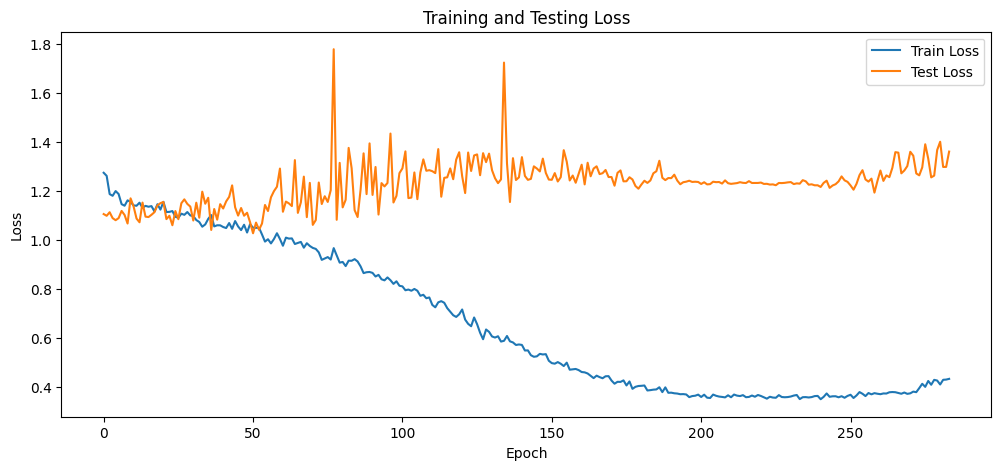

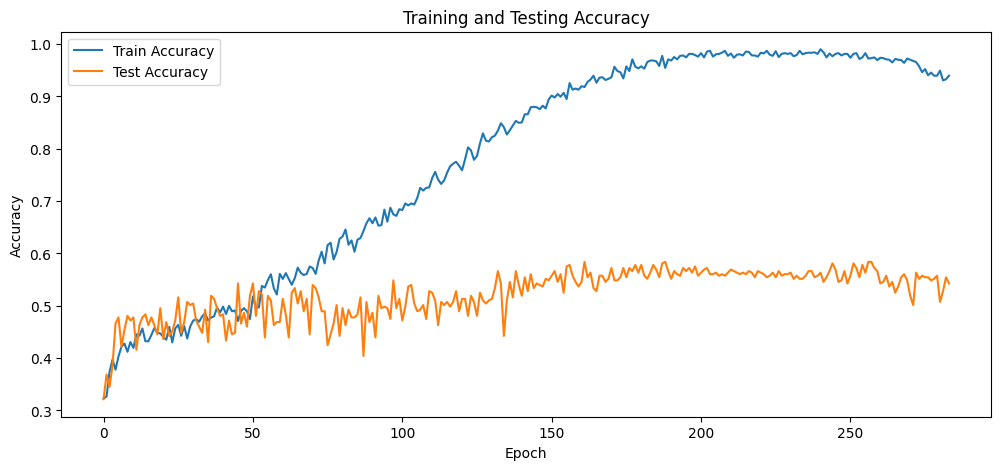

100%|██████████| 3/3 [00:02<00:00,  1.35it/s]


Evaluation Accuracy: 54.57%


100%|██████████| 3/3 [00:01<00:00,  1.64it/s]


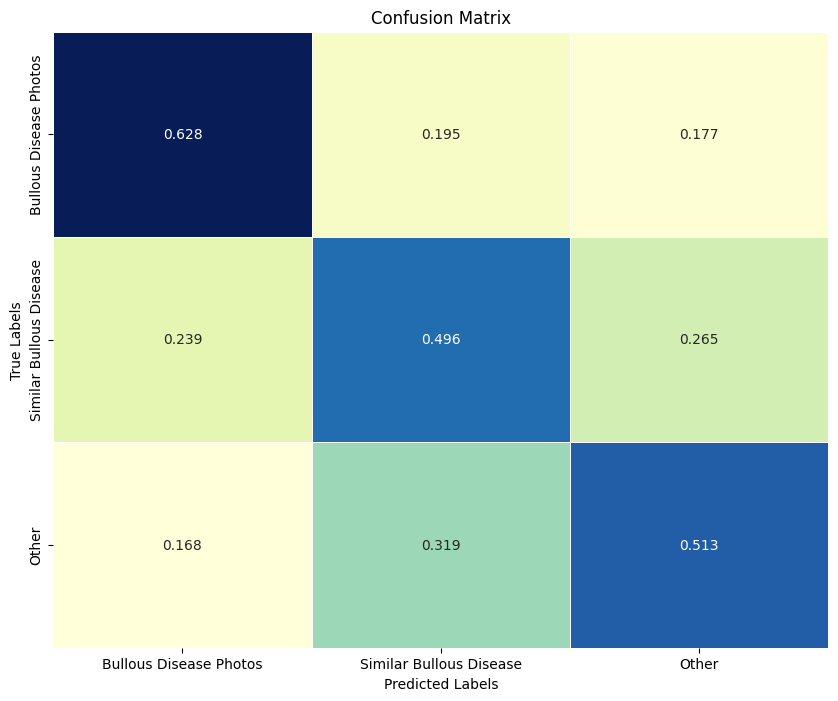

Prediction accuracy on sampled images: 55.56%


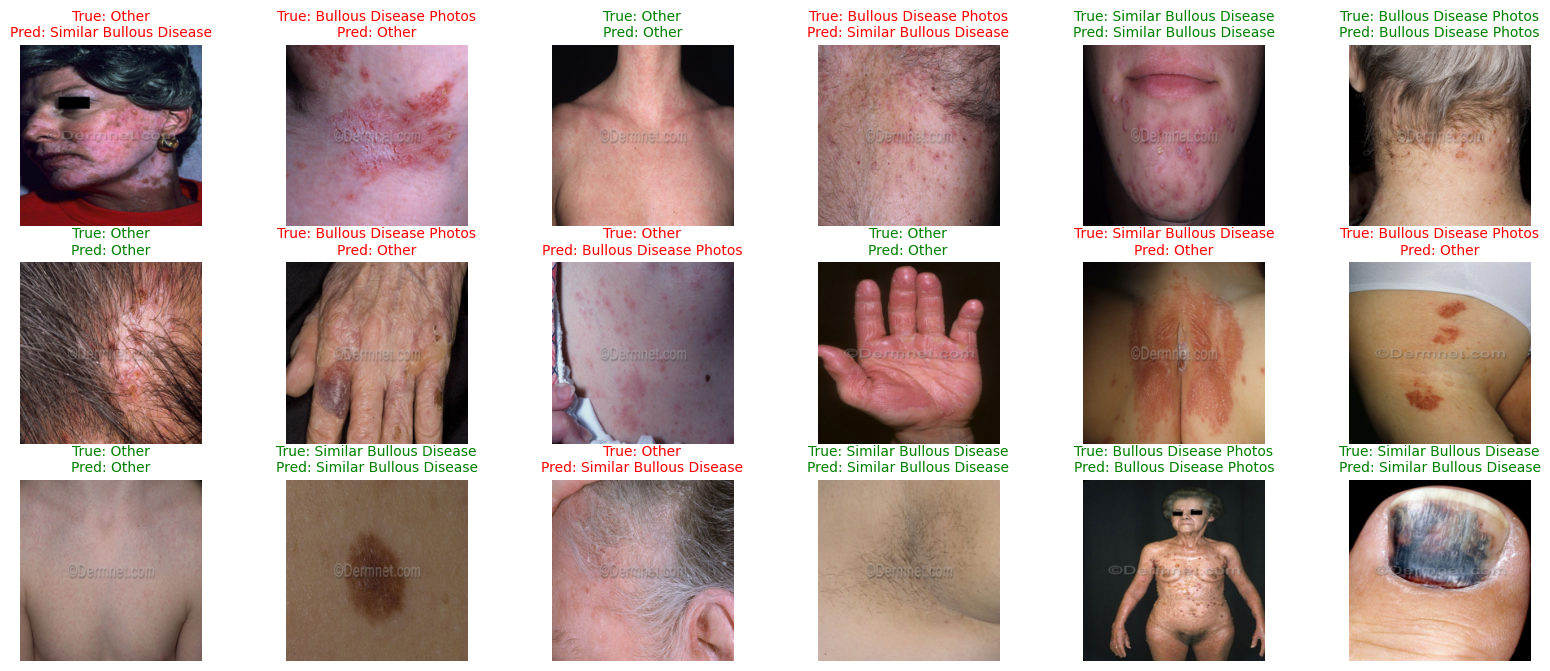

In [2]:
# Imports
import os
import torch
import numpy as np
import pandas as pd
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import random
import shutil
from tqdm import tqdm
from transformers.optimization import AdamW, get_cosine_schedule_with_warmup
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from collections import defaultdict
from torchvision import models
from transformers import get_cosine_schedule_with_warmup  # Adjust import if using a specific implementation
import seaborn as sns
from torchmetrics import ConfusionMatrix

# Step 1: DermnetDataset Class and DataFrames Creation
class DermnetDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]['path']
        label = self.dataframe.iloc[idx]['label']
        image = Image.open(img_path).convert("RGB")
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Directories for training and testing datasets
train_dir = "/kaggle/input/dermnet/train"
test_dir = "/kaggle/input/dermnet/test"

# Define Directories for the Dataset
train_target_dir = "/kaggle/working/distributed_train"
test_target_dir = "/kaggle/working/distributed_test"

# Define Main Categories and Subcategories
categories = {
    "Bullous Disease Photos": ["Bullous Disease Photos"],
    "Similar Bullous Disease": [
        "Exanthems and Drug Eruptions",
        "Psoriasis pictures Lichen Planus and related diseases",
        "Lupus and other Connective Tissue diseases",
        "Eczema Photos",
        "Urticaria Hives",
        "Herpes HPV and other STDs Photos",
        "Systemic Disease",
        "Vasculitis Photos"
    ],
    "Other": [
        "Light Diseases and Disorders of Pigmentation",
        "Acne and Rosacea Photos",
        "Systemic Disease",
        "Poison Ivy Photos and other Contact Dermatitis",
        "Vascular Tumors",
        "Hair Loss Photos Alopecia and other Hair Diseases",
        "Tinea Ringworm Candidiasis and other Fungal Infections",
        "Melanoma Skin Cancer Nevi and Moles",
        "Nail Fungus and other Nail Disease",
        "Scabies Lyme Disease and other Infestations and Bites",
        "Seborrheic Keratoses and other Benign Tumors",
        "Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions",
        "Cellulitis Impetigo and other Bacterial Infections",
        "Warts Molluscum and other Viral Infections"
    ]
}

# Function to distribute images evenly across categories
def distribute_images(data_dir, target_dir, target_count):
    images_to_copy = defaultdict(list)

    # Step 1: Gather all images for each main category from subcategories
    for main_category, subcategories in categories.items():
        for subcategory in subcategories:
            subcategory_path = os.path.join(data_dir, subcategory)
            if os.path.exists(subcategory_path):
                images = [os.path.join(subcategory_path, img) for img in os.listdir(subcategory_path) if img.endswith(('.jpg', '.jpeg', '.png'))]
                images_to_copy[main_category].extend(images)

    # Step 2: Ensure each main category has exactly target_count images
    for main_category in categories.keys():
        available_images = images_to_copy[main_category]

        if len(available_images) >= target_count:
            sampled_images = random.sample(available_images, target_count)
        else:
            # Not enough images, raise an alert and collect more from others
            print(f"Warning: Not enough images in {main_category}. Found: {len(available_images)}. Sampling from other categories.")
            sampled_images = available_images[:]
            needed = target_count - len(sampled_images)

            # Collect images from other categories
            for other_category, other_image_paths in images_to_copy.items():
                if other_category != main_category:
                    additional_samples = random.sample(other_image_paths, min(needed, len(other_image_paths)))
                    sampled_images.extend(additional_samples)
                    needed -= len(additional_samples)
                    if needed <= 0:
                        break

            # If still not enough images, raise an error
            if len(sampled_images) < target_count:
                raise ValueError(f"Not enough images could be found to satisfy the target count for {main_category}.")

        # Ensure the target folder structure exists
        category_target_path = os.path.join(target_dir, main_category)
        os.makedirs(category_target_path, exist_ok=True)

        # Copy sampled images to target directory
        for img_path in sampled_images:
            shutil.copy(img_path, category_target_path)

    # Step 3: Confirm the number of images in each target folder
    for main_category in categories.keys():
        count = len(os.listdir(os.path.join(target_dir, main_category)))
        print(f"{main_category}: {count} images")

# Distribute Images for Train and Test Sets Separately
train_target_count = 448  # Desired count per category in train
test_target_count = 113   # Desired count per category in test

print("Processing train dataset:")
distribute_images(train_dir, train_target_dir, train_target_count)

print("\nProcessing test dataset:")
distribute_images(test_dir, test_target_dir, test_target_count)

# Create DataFrames for train and test datasets
def create_dataframe(data_dir):
    imgs = []
    for label, class_name in enumerate(os.listdir(data_dir)):
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            if img_name.endswith(('.jpg', '.jpeg', '.png')):
                imgs.append([os.path.join(class_dir, img_name), label])
    return pd.DataFrame(imgs, columns=['path', 'label'])

train_df = create_dataframe(train_target_dir)
test_df = create_dataframe(test_target_dir)

# Step 2: Transformations for Augmentation
train_transform = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Create DermnetDataset Instances
train_data = DermnetDataset(train_df, transform=train_transform)
test_data = DermnetDataset(test_df, transform=test_transform)

# Step 3: DataLoader Creation
train_loader = DataLoader(train_data, batch_size=128, shuffle=True, num_workers=4)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False, num_workers=4)

# Step 4: DataLoader Verification - Retrieve a Sample Batch
images, labels = next(iter(train_loader))
fig, axs = plt.subplots(1, 6, figsize=(18, 6))
for i in range(6):
    img = images[i].permute(1, 2, 0).numpy()
    axs[i].imshow(img)
    axs[i].set_title(f"Label: {labels[i].item()}")
    axs[i].axis('off')
plt.show()

# Define CutMix and CutOut Functions
def cutout(img, mask_size=20, p=0.5):
    if random.random() > p:
        return img  # Skip cutout with probability 1-p

    _, h, w = img.shape  # Assuming image is in CHW format
    y = random.randint(mask_size // 2, h - mask_size // 2)
    x = random.randint(mask_size // 2, w - mask_size // 2)

    y1 = max(0, y - mask_size // 2)
    y2 = min(h, y + mask_size // 2)
    x1 = max(0, x - mask_size // 2)
    x2 = min(w, x + mask_size // 2)

    img[:, y1:y2, x1:x2] = 0  # Apply mask
    return img

def cutmix_data(x, y, alpha=1.0):
    lam = np.random.beta(alpha, alpha)
    batch_size = x.size()[0]
    index = torch.randperm(batch_size)

    bbx1, bby1, bbx2, bby2 = rand_bbox(x.size(), lam)
    x[:, :, bbx1:bbx2, bby1:bby2] = x[index, :, bbx1:bbx2, bby1:bby2]

    y_a, y_b = y, y[index]
    return x, y_a, y_b, lam

def rand_bbox(size, lam):
    W = size[2]
    H = size[3]
    cut_rat = np.sqrt(1. - lam)
    cut_w = int(W * cut_rat)
    cut_h = int(H * cut_rat)

    cx = np.random.randint(W)
    cy = np.random.randint(H)

    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2

# Step 5: Training and Evaluation Functions
def test_step(model, dataloader, loss_fn, device):
    model.eval()
    test_loss, test_acc = 0, 0
    total_samples = 0

    with torch.inference_mode():
        for batch, (X, y) in enumerate(tqdm(dataloader)):
            X, y = X.to(device), y.to(device)
            with torch.cuda.amp.autocast():  # Enable mixed precision
                test_pred_logits = model(X)
                loss = loss_fn(test_pred_logits, y)
                test_loss += loss.item()

                # Predictions and accuracy calculation
                test_pred_labels = torch.argmax(torch.softmax(test_pred_logits, dim=1), dim=1)
                test_acc += (test_pred_labels == y).sum().item()
                total_samples += y.size(0)

    test_loss /= len(dataloader)
    test_acc /= total_samples  # Adjust accuracy calculation for total samples
    return test_loss, test_acc

# Model Training

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize models and settings
use_pretrained_model = 'resnet'
use_training_model = 'densenet'

# Pre-trained ResNet for feature extraction
if use_pretrained_model == 'resnet':
    pretrained_model = models.resnet50(pretrained=True)
    pretrained_model.fc = nn.Linear(pretrained_model.fc.in_features, 3)
    pretrained_model = pretrained_model.to(device)
    # Freeze pre-trained model parameters
    for param in pretrained_model.parameters():
        param.requires_grad = False

# DenseNet model for training
if use_training_model == 'densenet':
    model = models.densenet201(pretrained=False)
    num_ftrs = model.classifier.in_features
    model.classifier = nn.Sequential(
        nn.BatchNorm1d(num_ftrs),          # BatchNorm on classifier input
        nn.Dropout(p=0.5),                 # Dropout for regularization
        nn.Linear(num_ftrs, 3)             # Output layer
    )

model = model.to(device)

# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = optim.AdamW(model.parameters(), lr=5e-4, weight_decay=1e-2)

# Learning rate scheduler
scheduler = get_cosine_schedule_with_warmup(
    optimizer, num_warmup_steps=50, num_training_steps=20 * len(train_loader)
)

# Initialize history dictionary
history = {
    "train_loss": [],
    "train_acc": [],
    "test_loss": [],
    "test_acc": [],
    "best_train_acc": (0, 0),  # (epoch, accuracy)
    "best_model": {}
}

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device,
          accumulation_steps: int = 1,  # for gradient accumulation
          history: dict = None):
  
    # Check and initialize missing history keys, if any
    if history is None:
        history = {}
    if "train_loss" not in history: history["train_loss"] = []
    if "train_acc" not in history: history["train_acc"] = []
    if "test_loss" not in history: history["test_loss"] = []
    if "test_acc" not in history: history["test_acc"] = []
    if "best_train_acc" not in history: history["best_train_acc"] = (0, 0)
    if "best_model" not in history: history["best_model"] = {}

    # Initialize GradScaler for mixed precision
    scaler = torch.cuda.amp.GradScaler()

    # Training loop across epochs
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        # Track training loss and accuracy
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        # Training loop with gradient accumulation and mixed precision
        for i, (inputs, labels) in enumerate(tqdm(train_dataloader)):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            # Forward pass with mixed precision
            with torch.cuda.amp.autocast():
                outputs = model(inputs)
                loss = loss_fn(outputs, labels) / accumulation_steps  # Scale loss for accumulation
                _, preds = torch.max(outputs, 1)
                running_loss += loss.item() * accumulation_steps
                correct_predictions += (preds == labels).sum().item()
                total_samples += labels.size(0)

            # Backward pass with scaled gradients
            scaler.scale(loss).backward()

            # Gradient accumulation: update weights every `accumulation_steps` batches
            if (i + 1) % accumulation_steps == 0:
                scaler.step(optimizer)
                scaler.update()
                optimizer.zero_grad()  # Reset gradients for the next accumulation

        # Calculate average training loss and accuracy for this epoch
        train_loss = running_loss / len(train_dataloader)
        train_acc = correct_predictions / total_samples
        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)

        # Validation (test) step
        test_loss, test_acc = test_step(
            model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn,
            device=device
        )

        # Update scheduler
        scheduler.step()

        # Print epoch results
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}\n"
            f"============================="
        )

        # Update history dictionary with test metrics
        history["test_loss"].append(test_loss)
        history["test_acc"].append(test_acc)

        # Track the best model and best training accuracy
        if test_acc > max(history["test_acc"], default=0):
            history["best_model"] = model.state_dict().copy()  # Save the best model state

        if train_acc > history["best_train_acc"][1]:  # Update best training accuracy
            history["best_train_acc"] = (epoch + 1, train_acc)

        # Early stopping condition
        if test_acc > 0.96:
            print(f"Early stopping at epoch {epoch + 1} with test accuracy {test_acc:.4f}")
            break

        # Clear CUDA cache between epochs to avoid memory fragmentation
        torch.cuda.empty_cache()

    # Return the trained model and history
    return model, history

# Multiple training calls with updated history tracking
model, history = train(model, train_loader, test_loader, optimizer, loss_fn, epochs=100, device=device, history=history)
model, history = train(model, train_loader, test_loader, optimizer, loss_fn, epochs=60, device=device, history=history)
model, history = train(model, train_loader, test_loader, optimizer, loss_fn, epochs=40, device=device, history=history)
model, history = train(model, train_loader, test_loader, optimizer, loss_fn, epochs=30, device=device, history=history)
model, history = train(model, train_loader, test_loader, optimizer, loss_fn, epochs=20, device=device, history=history)
model, history = train(model, train_loader, test_loader, optimizer, loss_fn, epochs=15, device=device, history=history)
model, history = train(model, train_loader, test_loader, optimizer, loss_fn, epochs=10, device=device, history=history)
model, history = train(model, train_loader, test_loader, optimizer, loss_fn, epochs=5, device=device, history=history)
model, history = train(model, train_loader, test_loader, optimizer, loss_fn, epochs=3, device=device, history=history)
model, history = train(model, train_loader, test_loader, optimizer, loss_fn, epochs=1, device=device, history=history)

# After training, print the final training and test metrics
final_train_loss = history["train_loss"][-1]
final_train_acc = history["train_acc"][-1]
final_test_loss = history["test_loss"][-1]
final_test_acc = history["test_acc"][-1]

print(f"Final Train Loss: {final_train_loss:.4f}, Final Train Acc: {final_train_acc:.4f}")
print(f"Final Test Loss: {final_test_loss:.4f}, Final Test Acc: {final_test_acc:.4f}")

# Plot Training History
plt.figure(figsize=(12, 5))
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["test_loss"], label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Testing Loss")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history["train_acc"], label="Train Accuracy")
plt.plot(history["test_acc"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy")
plt.legend()
plt.show()

# Add the evaluate function
def evaluate(model, dataloader):
    model.eval()
    n_correct = 0
    n_samples = 0

    with torch.no_grad():
        for images, labels in tqdm(dataloader):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)

            preds = torch.argmax(torch.softmax(outputs, dim=1), dim=1)

            n_samples += labels.size(0)
            n_correct += (preds == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f"Evaluation Accuracy: {acc:.2f}%")

# Evaluate the model on the test data
evaluate(model, test_loader)

# Compute and Plot Confusion Matrix
# Define the number of classes and class labels
num_classes = 3
class_labels = ['Bullous Disease Photos', 'Similar Bullous Disease', 'Other']

# Initialize the confusion matrix on the same device as the model
confmat = ConfusionMatrix(task="multiclass", num_classes=num_classes).to(device)

# Accumulate predictions and labels
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for inputs, labels in tqdm(test_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.append(preds)
        all_labels.append(labels)

# Concatenate all predictions and labels
all_preds = torch.cat(all_preds)
all_labels = torch.cat(all_labels)

# Ensure both `all_preds` and `all_labels` are on the same device as `confmat`
all_preds = all_preds.to(device)
all_labels = all_labels.to(device)

# Compute confusion matrix
confusion_matrix = confmat(all_preds, all_labels).cpu().numpy()

# Normalize the confusion matrix by row (true labels) for percentage display
confusion_matrix_normalized = confusion_matrix / confusion_matrix.sum(axis=1, keepdims=True)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix_normalized, 
    annot=True, 
    fmt=".3f", 
    cmap="YlGnBu", 
    xticklabels=class_labels, 
    yticklabels=class_labels,
    cbar=False,  # Hide color bar for a cleaner look
    linewidths=0.5,  # Add grid lines
    linecolor='white'  # Color of grid lines
)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.show()
# Now add the visually_evaluate function

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(["Bullous Disease Photos", "Similar Bullous Disease", "Other"])

def visually_evaluate(model, data_df, device, label_encoder):
    """
    Visual evaluation function for the model. It randomly selects images, 
    predicts labels, and displays them with true labels for comparison.
    
    Args:
    - model: Trained model to be evaluated.
    - data_df: DataFrame containing image paths and true labels.
    - device: The device on which the model is run.
    - label_encoder: Label encoder for decoding numerical labels.
    """
    num_rows = 3
    num_cols = 6

    # Randomly sample images from the DataFrame
    random_idx = np.random.choice(data_df.index, num_rows * num_cols, replace=False)
    sampled_imgs = data_df.iloc[random_idx]

    # Transform images for model input
    eval_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    eval_dataset = DermnetDataset(sampled_imgs, transform=eval_transform)
    eval_loader = DataLoader(eval_dataset, batch_size=num_rows * num_cols, shuffle=False)
    eval_images, true_labels = next(iter(eval_loader))
    
    # Move model and images to device
    model.eval()
    eval_images = eval_images.to(device)
    true_labels = true_labels.to(device)
    
    # Get predictions
    with torch.no_grad():
        outputs = model(eval_images)
        preds = torch.argmax(outputs, dim=1)
    
    # Decode labels for display
    true_labels_str = label_encoder.inverse_transform(true_labels.cpu().numpy())
    pred_labels_str = label_encoder.inverse_transform(preds.cpu().numpy())
    
    # Plot images with true and predicted labels
    plt.figure(figsize=(20, 8))
    correct_count = 0
    for idx in range(num_rows * num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")

        img = eval_images[idx].permute(1, 2, 0).cpu().numpy()
        plt.imshow(img)
        
        title = f"True: {true_labels_str[idx]}\nPred: {pred_labels_str[idx]}"
        title_obj = plt.title(title, fontdict={'fontsize': 10})
        
        # Color the title green if correct, red if incorrect
        if true_labels_str[idx] == pred_labels_str[idx]:
            correct_count += 1
            plt.setp(title_obj, color='green')
        else:
            plt.setp(title_obj, color='red')
    
    # Calculate and display accuracy
    accuracy = correct_count / (num_rows * num_cols)
    print(f"Prediction accuracy on sampled images: {accuracy * 100:.2f}%")
    plt.show()

# Visually evaluate the model on test data
visually_evaluate(model, test_df, device, label_encoder)

